# Thompson Sampling

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('Data/Ads_CTR_Optimisation.csv')

## Implementing Thompson Sampling

In [3]:
import random
N = 500
d = 10
ads_selected = []
numbers_of_reward_0 = [0] * d
numbers_of_reward_1 = [0] * d
total_reward = 0
for n in range(0, N):
    ad = 0
    max_random = 0
    for i in range(0, d):
        random_max = random.betavariate(numbers_of_reward_1[i] + 1, numbers_of_reward_0[i] + 1)
        if random_max > max_random:
            max_random = random_max
            ad = i
    ads_selected.append(ad)
    reward = dataset.values[n, ad]
    if reward == 1:
        numbers_of_reward_1[ad] += 1
    else:
        numbers_of_reward_0[ad] += 1
    total_reward += reward

## Visualising the results - Histogram

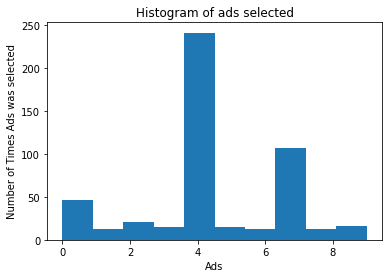

In [4]:
plt.hist(ads_selected)
plt.title('Histogram of ads selected')
plt.xlabel('Ads')
plt.ylabel('Number of Times Ads was selected')
plt.show()